In [1]:
# DataFrame with the engineered features is imported, along with necessary modules.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score, ConfusionMatrixDisplay

model_df = pd.read_csv('../Data/model_data.csv', index_col = 0)
model_df = model_df.drop('industry', axis = 1)
model_df.head(3)

,current_ratio,operating_cash_flow,debt_to_equity,interest_coverage,operating_margin,return_on_assets,return_on_equity,office,has_interest_payments
0001090872:2011:FY,3.031573,0.477953,1.098471,12.453488,0.533485,0.111737,0.234476,Industrial Applications and Services,1
0001090872:2012:FY,2.445325,-0.621236,1.032015,11.079208,0.525518,0.109434,0.222372,Industrial Applications and Services,1
0001090872:2013:FY,3.110487,0.202247,1.020420,8.887850,0.521233,0.067752,0.136888,Industrial Applications and Services,1


In [2]:
# The Office column will be used to test the Random Forest Classifier. This column includes 10 possible classifications.
# This represents the US government office that each company falls under on the basis of how their core business operates.
# Can be used for the purposes of testing as a simpler classification rather than the exhaustive 300+ industry list.

In [3]:
# The Office column is categorical, and must first be numerically encoded before classification can take place.

target_encoding = LabelEncoder()
scaler = QuantileTransformer(n_quantiles = 20000, subsample= 25000)

X = model_df.drop('office', axis = 1).copy()

X = scaler.fit_transform(X)

y = model_df['office'].copy()

y = target_encoding.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
# The Random Forest model is defined. F1 score will be the primary metric used for measuring the model. 
# Otherwise, a relatively high accuracy could be achieved by the model by simply guessing the most common Office naively.

model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f'Precision Score : {precision_score(y_test, y_pred, average = "weighted", zero_division = 0)}')
print(f'Recall Score : {recall_score(y_test, y_pred, average = "weighted")}')
print(f'F1 Score : {f1_score(y_test, y_pred, average = "weighted")}')

Precision Score : 0.30229847334441906
Recall Score : 0.30146928659939815
F1 Score : 0.29504248802566835


{0: 'Industrial Applications and Services', 1: 'Office of Crypto Assets', 2: 'Office of Energy & Transportation', 3: 'Office of Finance', 4: 'Office of Finance or Office of Crypto Assets', 5: 'Office of Life Sciences', 6: 'Office of Manufacturing', 7: 'Office of Real Estate & Construction', 8: 'Office of Technology', 9: 'Office of Trade & Services'}


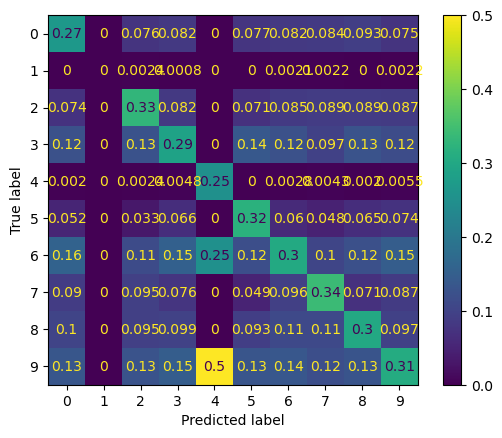

In [5]:
# Below is a confusion matrix for each Office according to their order in the dictionary.
# The precision and recall of the model varied significantly from office to office.
# The model was better at predicting 

office_dict = {}

for label in range(len(target_encoding.classes_)):
    office = target_encoding.classes_[label]
    office_dict[label] = office
    
print(office_dict)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize = 'pred')
plt.show()
